# Import DATA & Modules / Librairies

In [1]:
# Connexion à Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import des bibliothèques principales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Visualisation graphique
import matplotlib.ticker as ticker # Gestion des ticks
import seaborn as sns         # Visualisations avancées et esthétiques
import plotly.express as px   # Visualisations interactives
import scipy.stats as stats   # Tests et statistiques
from scipy.stats import kstest, spearmanr, shapiro, chi2_contingency, kruskal # Import de fonctions statistiques

In [3]:
# Chargement des fichiers CSV

transactions = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P9/Data brute/Transactions.csv')
customers = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P9/Data brute/customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P9/Data brute/products.csv')

# Analyse exploratoire des fichiers

## Analyse de transaction

In [4]:
# Vérification rapide de la structure de transactions

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [5]:
# Visualisation de transactions

transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


* 4 colonnes - 687 534 lignes
* Aucune valeur Null
* Type mal renseigner : id_prod, session_id, client_id (string) - date (YY/MM/DD - HH-MM-SS)

In [6]:
# Création d'une copie indépendante de transaction avant modification des types de données

df_transactions = transactions.copy()

# Date type Object > datetime pour faciliter les manipulations temporelles

df_transactions['date'] = pd.to_datetime(df_transactions['date'],errors='coerce')


In [7]:
# Création des colonnes Année, mois, jour pour faciliter les filtres
df_transactions['annee'] = df_transactions['date'].dt.year
df_transactions['mois']  = df_transactions['date'].dt.month
df_transactions['jour']  = df_transactions['date'].dt.day

# année-mois en Period (pratique pour groupby mensuels)
df_transactions['annee_mois'] = df_transactions['date'].dt.to_period('M')

In [8]:
# Vérification des doublons, outliers
df_transactions.describe(include='all')

,id_prod,date,session_id,client_id,annee,mois,jour,annee_mois
count,687534,687534,687534,687534,687534.000000,687534.000000,687534.000000,687534
unique,3265,NaN,345505,8600,NaN,NaN,NaN,24
top,1_369,NaN,s_118668,c_1609,NaN,NaN,NaN,2021-09
freq,2340,NaN,14,25586,NaN,NaN,NaN,33314
mean,NaN,2022-03-01 21:24:00.618519296,NaN,NaN,2021.662289,6.547208,15.715258,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN,2021.000000,1.000000,1.000000,NaN
25%,NaN,2021-09-10 10:35:20.642323456,NaN,NaN,2021.000000,4.000000,8.000000,NaN
50%,NaN,2022-02-27 06:50:25.400120064,NaN,NaN,2022.000000,7.000000,16.000000,NaN
75%,NaN,2022-08-28 22:16:49.841665536,NaN,NaN,2022.000000,10.000000,23.000000,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN,2023.000000,12.000000,31.000000,NaN


In [75]:
# Comptage des doublons dans la table transactions
nb_doublons_transactions = df_transactions.duplicated().sum()
# .duplicated() renvoie True/False si une ligne est un doublon d’une ligne précédente
# .sum() additionne les True (considérés comme 1) pour donner le nombre total de doublons

print(nb_doublons_transactions)

0


In [10]:
# Conversion des types de données
df_transactions[['id_prod', 'client_id', 'session_id']] = (df_transactions[['id_prod', 'client_id', 'session_id']].astype(str))

* Pas de valeurs abbérantes à priori
* Client c_1609 à controler (top client)


## Analyse de customers

In [11]:
# Vérification rapide de la structure de la table clients
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [12]:
# Visualisation de customers
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


* Type object à modifier > String
* Pas de valeur Null repérée

In [13]:
# Création d'une copie de customers
df_customers = customers.copy()

In [14]:
# Conversion des types de données
colonnes_a_convertir_2 = ['client_id', 'sex']
df_customers[colonnes_a_convertir_2] = df_customers[colonnes_a_convertir_2].astype('string')
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   string
 1   sex        8621 non-null   string
 2   birth      8621 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 202.2 KB


In [15]:
# Controle des doublons et outliers
df_customers.describe(include='all')

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_2998,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [16]:
nb_doublons_customers = df_customers.duplicated().sum()
print(nb_doublons_customers)

0


* Pas d'outliers
* Pas de doublon

## Analyse de products

In [17]:
# Vérification de products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [18]:
# Création d'une copie de products
df_products = products.copy()

In [19]:
# Conversion des types de données
colonnes_a_convertir_3 =['id_prod', 'categ']
df_products[colonnes_a_convertir_3] = df_products[colonnes_a_convertir_3].astype('string')
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   string 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   string 
dtypes: float64(1), string(2)
memory usage: 77.1 KB


In [20]:
# Controle des outliers et doublons
df_products.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286
unique,3286,NaN,3
top,1_463,NaN,0
freq,1,NaN,2308
mean,NaN,21.863597,NaN
std,NaN,29.849786,NaN
min,NaN,0.620000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.075000,NaN
75%,NaN,22.990000,NaN


In [21]:
nb_doublons_products = df_products.duplicated().sum()
print(nb_doublons_products)

0


# Jointures

In [22]:
# Construction d'une table complète "lapage" en fusionnant transactions, clients et produits
# Jointure avec la table clients sur la clé 'client_id'
lapage = (df_transactions

          .merge(df_customers,
                 on='client_id',        # Clé utilisée pour la jointure
                 how='left',            # Conserve toutes les transactions, même si pas de client associé
                 indicator='m_clients', # Ajoute une colonne qui indique l'origine de chaque ligne ('both', 'left_only', 'right_only')
                 validate='many_to_one',# Vérifie que chaque client_id correspond à au plus une ligne dans df_customers
                 suffixes=('', '_cust') # Ajoute le suffixe '_cust' aux colonnes de clients en cas de doublon de noms
                 )

# Jointure avec la table produits sur la clé 'id_prod'
          .merge(df_products,
                 on='id_prod',          # Clé utilisée pour la jointure
                 how='left',            # Conserve toutes les transactions, même si pas de produit associé
                 indicator='m_products',# Ajoute une colonne qui indique l'origine de chaque ligne pour la jointure produit
                 validate='many_to_one',# Vérifie que chaque produit correspond à au plus une ligne dans df_products
                 suffixes=('', '_prod') # Ajoute le suffixe '_prod' aux colonnes de produits si doublon de noms
                 )
         )


In [23]:
# Comptage des valeurs dans la colonne 'm_clients'
lapage['m_clients'].value_counts()

# 'both'       : l'id_client présent dans transactions ET dans customers
# 'left_only'  : l'id_client présent uniquement dans transactions (pas trouvé dans customers)
# 'right_only' : l'id_client présent uniquement dans customers (pas trouvé dans transactions)

,count
m_clients,
both,687534
left_only,0
right_only,0


In [24]:
# Comptage des valeurs dans la colonne 'm_products'
lapage['m_products'].value_counts()

#'both'       : l'id_prod présent dans transactions ET dans products
#'left_only'  : l'id_prod présent uniquement dans transactions (pas trouvé dans products)
#'right_only' : l'id_prod présent uniquement dans products (pas trouvé dans transactions)

,count
m_products,
both,687534
left_only,0
right_only,0


In [25]:
# Vérification du nombre de lignes avant/après entre df_transactions et lapage
lapage.shape[0], df_transactions.shape[0]

(687534, 687534)

In [26]:
# Visualisation de lapage
lapage.head()

,id_prod,date,session_id,client_id,annee,mois,jour,annee_mois,sex,birth,m_clients,price,categ,m_products
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,3,1,2021-03,f,1967,both,11.99,0,both
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,3,1,2021-03,m,1960,both,19.37,0,both
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,3,1,2021-03,m,1988,both,4.50,0,both
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,3,1,2021-03,f,1989,both,6.55,0,both
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,3,1,2021-03,f,1956,both,16.49,0,both


In [27]:
# Suppression des colonnes m_clients et m_products
lapage = lapage.drop(columns=['m_clients', 'm_products'])

In [28]:
# Renommage de la colonne price
lapage = lapage.rename(columns={'price': 'CA'})

In [29]:
# Calcul de l'age des clients
lapage['age'] = 2023 - lapage['birth']

# Si on veut un calcul dynamique avec l'année en cours :
# import datetime
# lapage['age'] = datetime.datetime.now().year - lapage['birth']

In [30]:
# Vérification de lapage
lapage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   annee       687534 non-null  int32         
 5   mois        687534 non-null  int32         
 6   jour        687534 non-null  int32         
 7   annee_mois  687534 non-null  period[M]     
 8   sex         687534 non-null  string        
 9   birth       687534 non-null  int64         
 10  CA          687534 non-null  float64       
 11  categ       687534 non-null  string        
 12  age         687534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(3), period[M](1), string(2)
memory usage: 60.3+ MB


# Point global sur les différents indicateurs et chiffres clés de l’entreprise

## Partie 1 - analyse des différents indicateurs de vente

### CA toutes catégorie - Par Années

In [31]:
# Calcul du CA pour chaque année

ca_annuel = lapage.groupby('annee')['CA'].sum().reset_index()
# On regroupe chaque ligne de lapage par année puis on sommes le CA pour chaque année.

print(ca_annuel)

   annee          CA
0   2021  4944760.98
1   2022  6108681.81
2   2023   974220.31


In [32]:
# Calcul du CA toutes années confondues

ca_global = ca_annuel['CA'].sum()
print(ca_global)

12027663.1


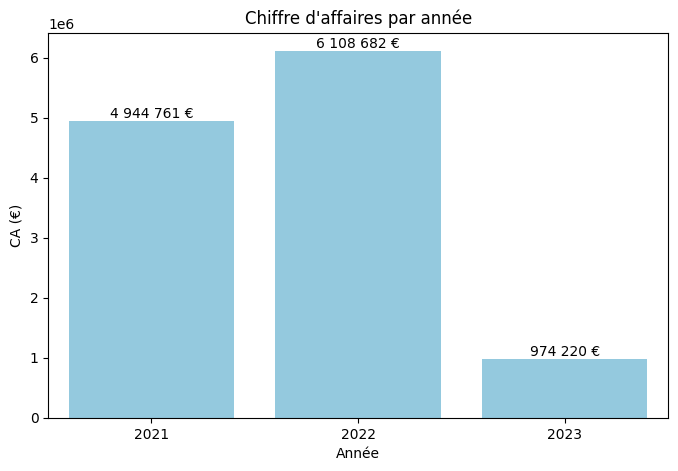

In [33]:
# Graphique CA par année

plt.figure(figsize=(8,5))
ax = sns.barplot(data=ca_annuel, x='annee', y='CA', color='skyblue')

plt.title("Chiffre d'affaires par année")
plt.xlabel("Année")
plt.ylabel("CA (€)")

# Ajouter les valeurs formatées au dessus des barres
ax.bar_label(
    ax.containers[0],
    labels=[f"{v.get_height():,.0f} €".replace(",", " ") for v in ax.containers[0]])

plt.show()

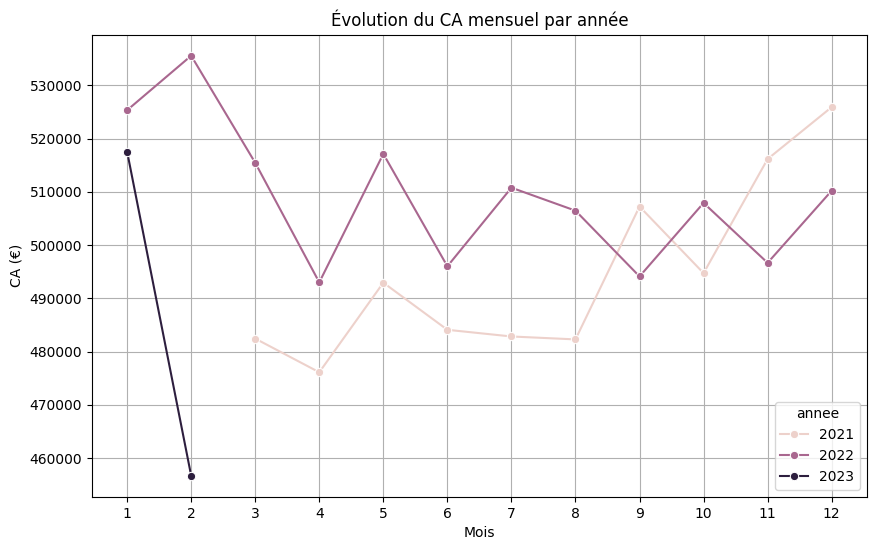

In [34]:
# Evolution du CA par mois pour chaques années

# Regrouper les données par année et mois puis somme sur CA
ca_mensuel = (lapage.groupby(['annee', 'mois'])['CA'].sum().reset_index())

# Graphique

plt.figure(figsize=(10,6))
sns.lineplot(data=ca_mensuel, x='mois', y='CA', hue='annee', marker='o')

plt.title("Évolution du CA mensuel par année")
plt.xlabel("Mois")
plt.ylabel("CA (€)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

### Chiffre d’affaires par catégorie

In [35]:
# Calcul du CA annuel par catégorie
CA_annuel_categ = (lapage.groupby(['annee', 'categ'], as_index=False)['CA'].sum().sort_values(['annee','categ']))

# groupby(['annee','categ']) regroupe les lignes par couple (année, catégorie)
# as_index=False évite que 'annee' et 'categ' deviennent l’index, les garde comme colonnes

print(CA_annuel_categ)

   annee categ          CA
0   2021     0  1883020.45
1   2021     1  1951930.27
2   2021     2  1109810.26
3   2022     0  2192970.46
4   2022     1  2485275.19
5   2022     2  1430436.16
6   2023     0   343740.06
7   2023     1   390451.65
8   2023     2   240028.60


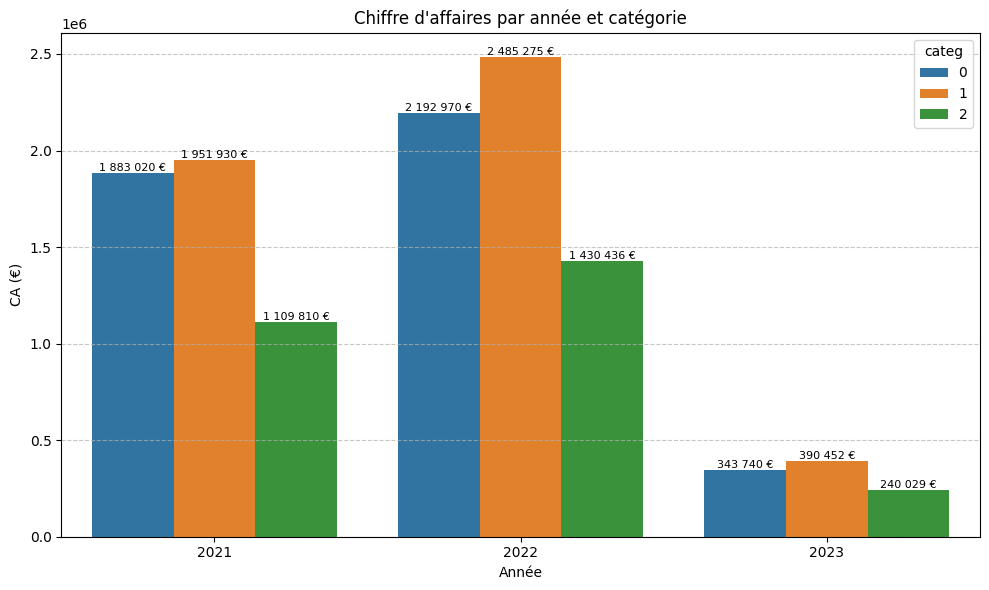

In [36]:
# Graphique CA par année et catégorie

plt.figure(figsize=(10,6))
ax = sns.barplot(data=CA_annuel_categ, x="annee", y="CA", hue="categ")

plt.title("Chiffre d'affaires par année et catégorie")
plt.xlabel("Année")
plt.ylabel("CA (€)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs au-dessus de chaque barre avec formatage
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v.get_height():,.0f} €".replace(",", " ") for v in container],
        fontsize=8)

plt.tight_layout()
plt.show()

### Chiffre d’affaires avec la moyenne mobile (choisir période : année, mois, jour...)

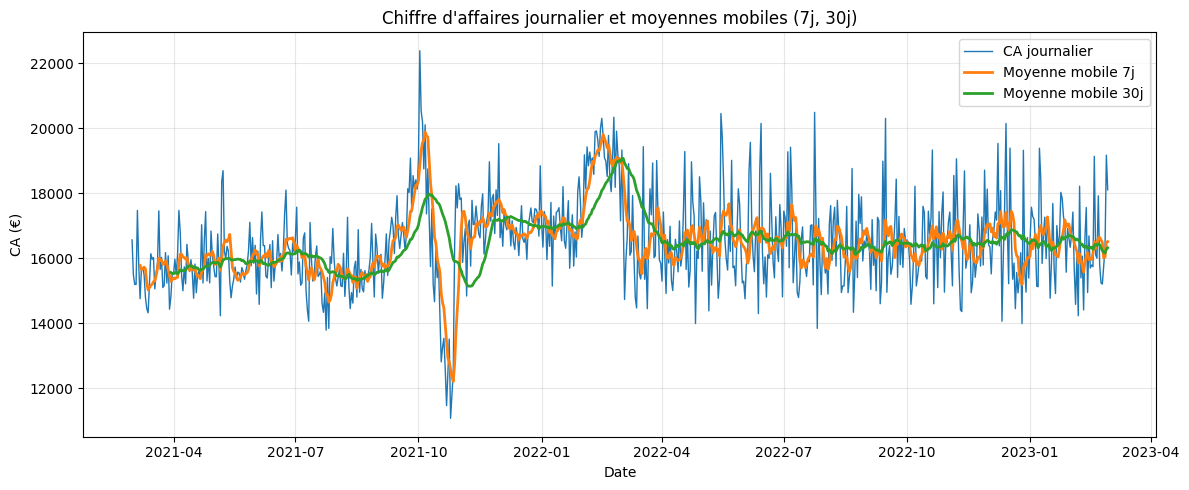

In [37]:
# CA journalier avec moyenne mobile (7 et 30 jours)

# Calcul du CA journalier
CA_journalier = (lapage.groupby(pd.Grouper(key='date', freq='D'))['CA'].sum().sort_index())

# pd.Grouper(key='date', freq='D') : regroupe les données par jour
# ['CA'].sum() : somme du chiffre d'affaires par jour
# sort_index() : trie les dates dans l'ordre chronologique

# Calcul des moyennes mobiles
MM7 = CA_journalier.rolling(window=7, min_periods=7).mean()
MM30 = CA_journalier.rolling(window=30, min_periods=30).mean()

# .rolling(window=x) crée une fenêtre glissante de x jours sur la série chronologique
# min_periods=x exige qu’il y ait au moins x jours remplis pour calculer la moyenne (pour les x premiers jours, le résultat est NaN)
# .mean() calcule la moyenne de la fenêtre de x jours

       #### Note ####
# Jour 1 pas assez de données (NaN)
# Jour 7 moyenne des jours 1 à 7
# Jour 8 moyenne des jours 2 à 8
# Jour 9 moyenne des jours 3 à 9

# Graphique CA journalier - moyenne glissante 7 et 30 jours
plt.figure(figsize=(12,5))
plt.plot(CA_journalier.index, CA_journalier, label='CA journalier', linewidth=1)
plt.plot(MM7.index, MM7, label='Moyenne mobile 7j', linewidth=2)
plt.plot(MM30.index, MM30, label='Moyenne mobile 30j', linewidth=2)

plt.title("Chiffre d'affaires journalier et moyennes mobiles (7j, 30j)")
plt.xlabel("Date")
plt.ylabel("CA (€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


La courbe bleue (CA journalier) montre une forte volatilité avec de nombreux pics et creux quotidiens.

La moyenne mobile 7 jours (orange) lisse ces variations tout en restant réactive :
elle reflète bien les tendances à court terme (impact immédiat d’événements ou de promotions).

La moyenne mobile 30 jours (verte) est plus lisse et réagit plus lentement :
elle met en évidence la tendance de fond et permet de suivre l’évolution globale.

Autour de septembre 2021, on observe un pic marqué suivi d’une chute brutale :
la MM7 suit rapidement cette variation,
la MM30 amortit et relativise l’effet ponctuel.
En 2022, les courbes indiquent une stabilisation : le CA fluctue mais reste globalement autour d’un plateau.

### Nombre de clients par mois

In [38]:
# Calcul du nombre de client unique par mois et par année

clients_mensuel = (lapage.groupby(['annee_mois'], as_index=False)['client_id'].nunique().rename(columns={'client_id': 'nb_clients'}))
clients_mensuel.head()

,annee_mois,nb_clients
0,2021-03,5676
1,2021-04,5674
2,2021-05,5644
3,2021-06,5659
4,2021-07,5672


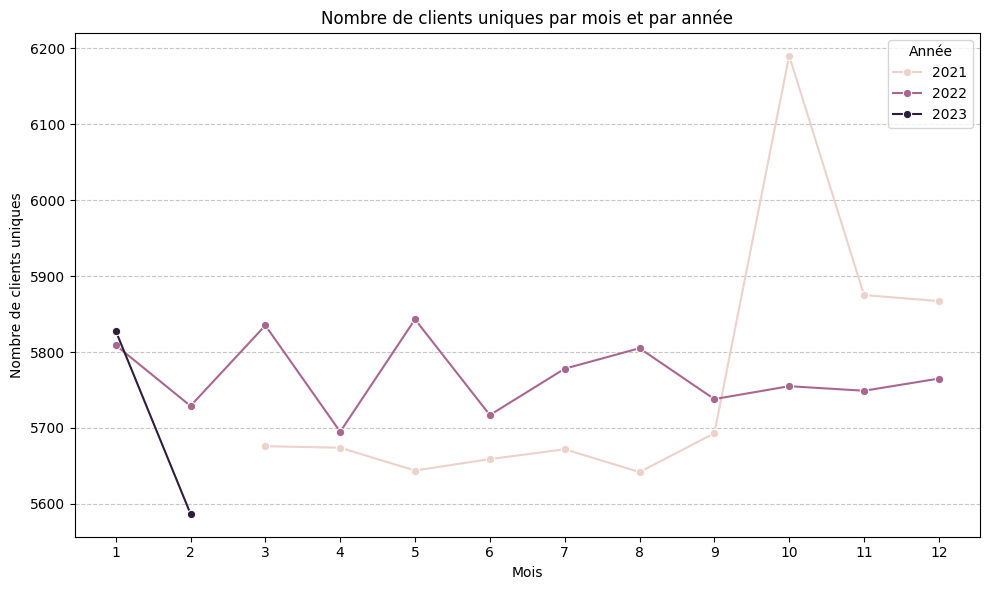

In [39]:
# Calcul du nombre de client unique par mois et par année
clients_par_annee_mois = (lapage.groupby(['annee', 'mois'])['client_id'].nunique().reset_index(name='nb_clients'))

# Graphique client/mois/année
plt.figure(figsize=(10,6))
sns.lineplot(data=clients_par_annee_mois, x="mois", y="nb_clients", hue="annee", marker="o")

plt.title("Nombre de clients uniques par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Nombre de clients uniques")
plt.xticks(range(1,13))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

* On peut observer un flux très plat au lancement du site (2021) puis un pic vers octobre.
* 2022 est plus contrasté avec un trafic irrégulier en début d'année puis un 'plateau' en fin d'année.
* Pas assez d'informations pour 2023.

### Nombre de transaction

In [40]:
# Repérer les session_id qui apparaissent plus d'une fois

sessions_multi = lapage["session_id"].value_counts()
sessions_multi = sessions_multi[sessions_multi > 1]
print(sessions_multi.head())


session_id
s_118668    14
s_215292    13
s_96857     13
s_21005     13
s_342045    13
Name: count, dtype: int64


In [41]:
# Afficher toutes les lignes correspondant à une session_id précise

lapage[lapage["session_id"] == "s_118668"]


,id_prod,date,session_id,client_id,annee,mois,jour,annee_mois,sex,birth,CA,categ,age
237009,2_209,2021-11-12 20:00:00.956739,s_118668,c_5995,2021,11,12,2021-11,f,1992,69.99,2,31
237011,0_1519,2021-11-12 20:01:58.131234,s_118668,c_5995,2021,11,12,2021-11,f,1992,5.99,0,31
237013,0_1089,2021-11-12 20:02:54.200624,s_118668,c_5995,2021,11,12,2021-11,f,1992,3.99,0,31
237014,0_1334,2021-11-12 20:08:40.783542,s_118668,c_5995,2021,11,12,2021-11,f,1992,17.74,0,31
237015,0_1564,2021-11-12 20:09:17.901543,s_118668,c_5995,2021,11,12,2021-11,f,1992,11.12,0,31
237018,1_498,2021-11-12 20:18:11.950251,s_118668,c_5995,2021,11,12,2021-11,f,1992,23.37,1,31
237021,0_1108,2021-11-12 20:20:33.659396,s_118668,c_5995,2021,11,12,2021-11,f,1992,17.45,0,31
237024,0_1488,2021-11-12 20:23:50.319430,s_118668,c_5995,2021,11,12,2021-11,f,1992,4.60,0,31
237025,1_81,2021-11-12 20:24:02.266858,s_118668,c_5995,2021,11,12,2021-11,f,1992,33.99,1,31
237028,0_1612,2021-11-12 20:27:59.185956,s_118668,c_5995,2021,11,12,2021-11,f,1992,13.54,0,31


1 session_id = 1 session d’achat (une transaction globale, plusieurs produit). Donc session_id = 1 transaction. .nunique()

l'ensemble d'une session_id = nombre d'article acheté.  .count()


In [42]:
# Calcul du nombre de transaction par année
transactions_par_annee = (lapage.groupby(['annee'])['session_id'].nunique().reset_index(name='nb_transactions'))
transactions_par_annee.head()

,annee,nb_transactions
0,2021,143096
1,2022,174581
2,2023,27831


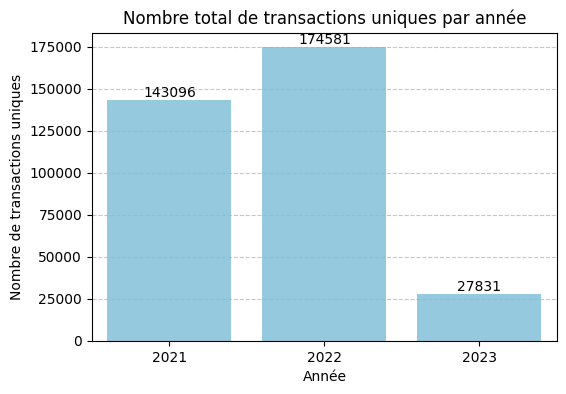

In [43]:
# Graphique nombre total de transaction par année

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=transactions_par_annee,
    x="annee", y="nb_transactions",
    color="skyblue"
)

plt.title("Nombre total de transactions uniques par année")
plt.xlabel("Année")
plt.ylabel("Nombre de transactions uniques")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge")

plt.show()


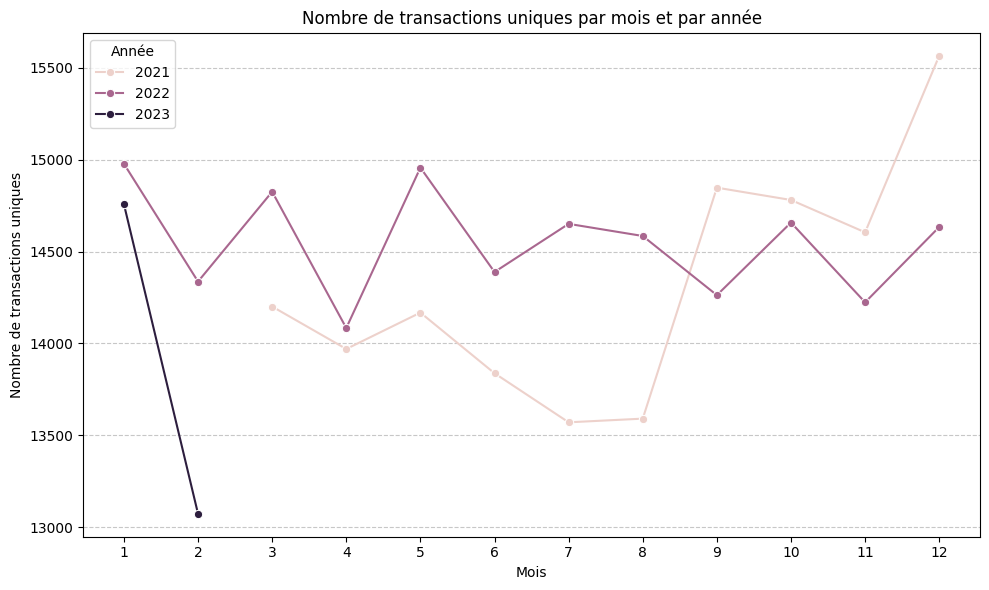

In [44]:
# Calcul du nombre de transaction unique par mois et par année
transactions_par_annee_mois = (lapage.groupby(['annee', 'mois'])['session_id'].nunique().reset_index(name='nb_transactions'))

# Graphique : nombre de transactions par mois et par année
plt.figure(figsize=(10,6))
sns.lineplot(data=transactions_par_annee_mois,
              x="mois", y="nb_transactions",
              hue="annee", marker="o")

plt.title("Nombre de transactions uniques par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions uniques")
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

* Nombre de transaction 2021 ne suit pas la courbe du trafic client. On observe beaucoup de pic et creux.
* 2022 chaotique. Pas vraiment de plateau ou de tendance forte, à l'exception du pic de septembre

### Nombre de produits vendus

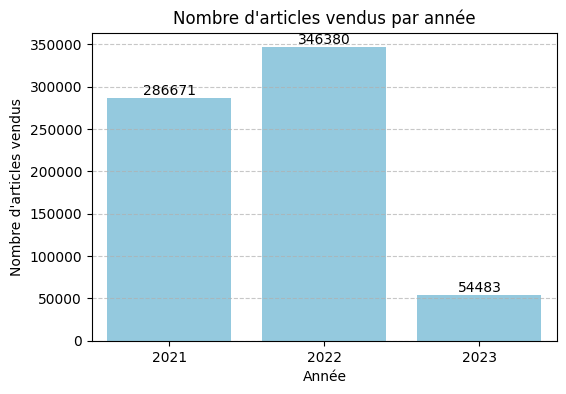

In [45]:
# Nombre d'articles vendus par année
articles_par_an = (lapage.groupby(['annee'])['session_id'].count().reset_index(name='nb_articles'))

# Graphique nombre d'articles vendu par année
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=articles_par_an,
    x="annee", y="nb_articles",
    color="skyblue")

plt.title("Nombre d'articles vendus par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'articles vendus")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajouter les valeurs au-dessus des barres
ax.bar_label(ax.containers[0], fmt="%.0f")

plt.show()


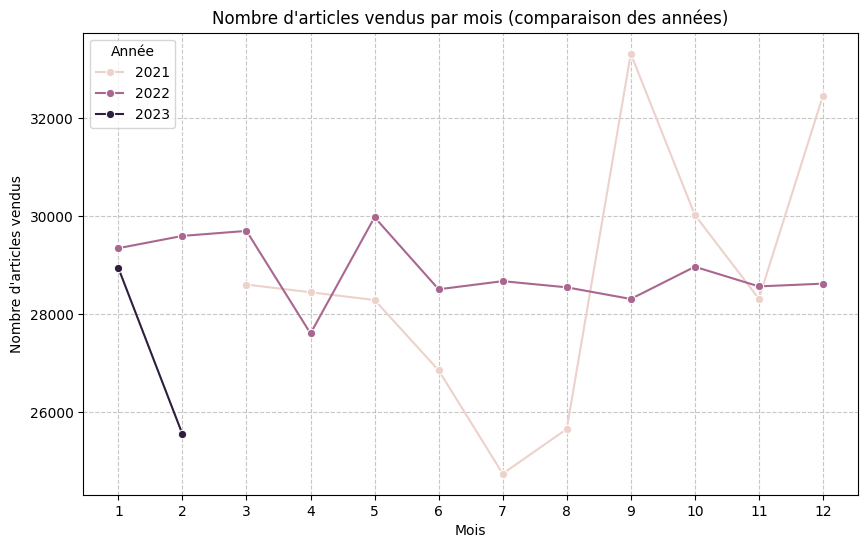

In [46]:
# Calcul nombre d'articles vendus par mois et par année
articles_par_mois_annee = (lapage.groupby(["annee", "mois"]).size().reset_index(name="nb_articles"))

# Graphique
plt.figure(figsize=(10,6))
sns.lineplot(data=articles_par_mois_annee,
             x="mois", y="nb_articles",
             hue="annee", marker="o")

plt.title("Nombre d'articles vendus par mois (comparaison des années)")
plt.xlabel("Mois")
plt.ylabel("Nombre d'articles vendus")
plt.xticks(range(1,13))
plt.legend(title="Année")
plt.grid(linestyle="--", alpha=0.7)
plt.show()

* 2021 : Début plutot fort les 3 premiers mois, une forte baisse des quantités entre mai et juillet. Enorme bon en septembre puis rechute jusqu'en novembre et de nouveau, enorme hausse en décembre.
* 2022 : Début d'année plus fort que 2021, creux en mars et pic en avril. Plateau jusqu'en fin d'année. Etonnant pas de hausse en septembre (rentrée des classes) et décembre (noel).

### Les tops 10 des ventes

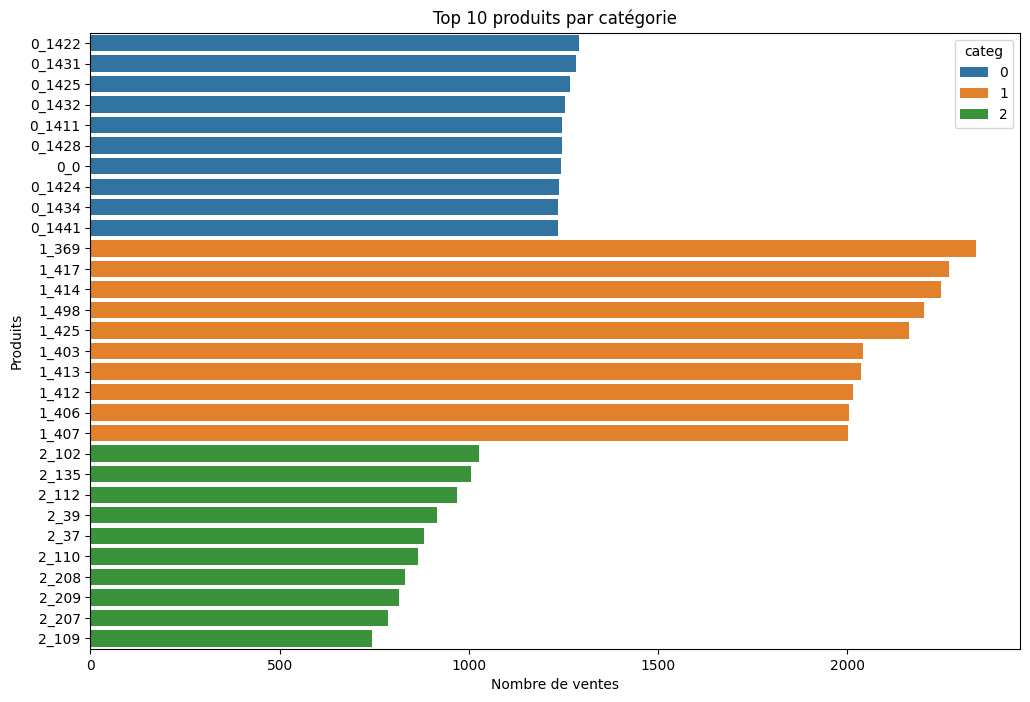

In [47]:
# Calcul du top 10 des produits vendu par catégorie
top_ventes = (lapage.groupby(['id_prod', 'categ']).size().reset_index(name='nb_ventes').sort_values(['categ', 'nb_ventes'], ascending=[True, False]))

# groupby(['id_prod','categ']) : regroupe par produit et catégorie
# .size() : compte le nombre de lignes (= nombre de ventes du produit)
# .reset_index(name='nb_ventes') : transforme le résultat en DataFrame avec une colonne nb_ventes
# ascending=[true, false] : trie d’abord par catégorie, puis par nombre de ventes décroissant

top10_par_categ = top_ventes.groupby('categ').head(10)
# prend les 10 premiers produits les plus vendus par catégorie

plt.figure(figsize=(12,8))
sns.barplot(
    data=top10_par_categ,
    x="nb_ventes", y="id_prod",
    hue="categ", dodge=False)

plt.title("Top 10 produits par catégorie")
plt.xlabel("Nombre de ventes")
plt.ylabel("Produits")
plt.show()


On constate que la catégorie largement dominante est la 1, suivi de la 0 puis 2.
La catégorie 1 possède également le top 10 toute catégorie confondu.

### Les flops 10 des ventes

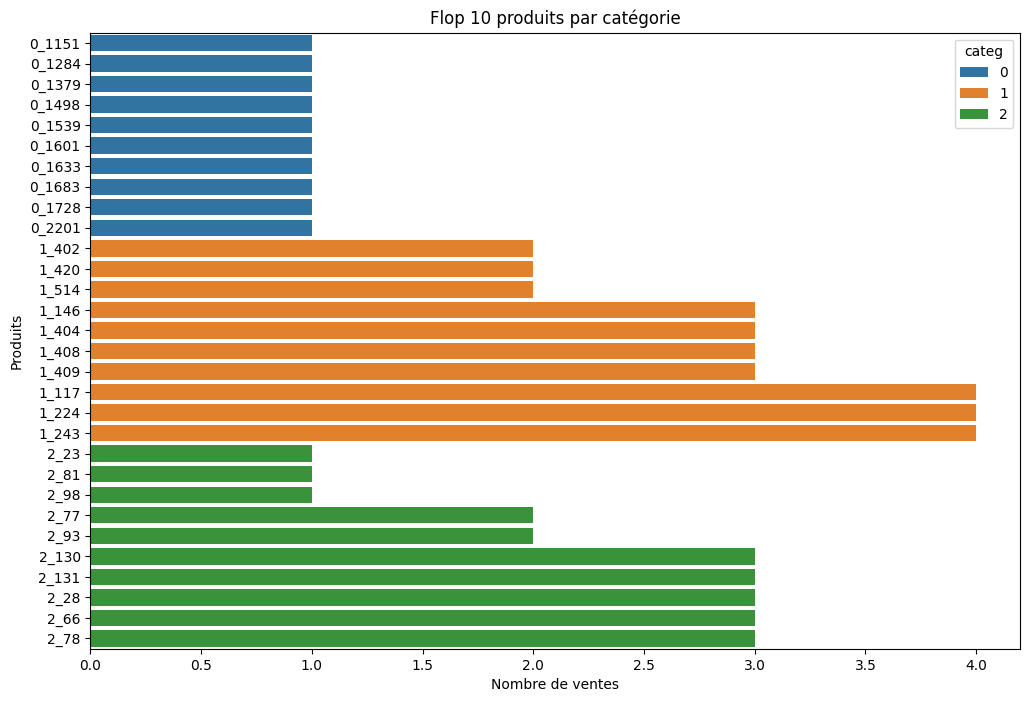

In [48]:
# Calcul du flop 10 des ventes par catégorie
flop10_ventes = (lapage.groupby(['id_prod', 'categ']).size().reset_index(name='nb_ventes').sort_values(['categ', 'nb_ventes'], ascending=[True, True]))

flop10_par_categ = flop10_ventes.groupby('categ').head(10)
# prend les 10 premiers produits les moins vendus par catégorie

# Graphique
plt.figure(figsize=(12,8))
sns.barplot(
    data=flop10_par_categ,
    x="nb_ventes", y="id_prod",
    hue="categ", dodge=False)

plt.title("Flop 10 produits par catégorie")
plt.xlabel("Nombre de ventes")
plt.ylabel("Produits")
plt.show()


* Résultats plus homogène pour les flop. Meme si la catégorie 0 reste celle qui accuse le moins de vente.

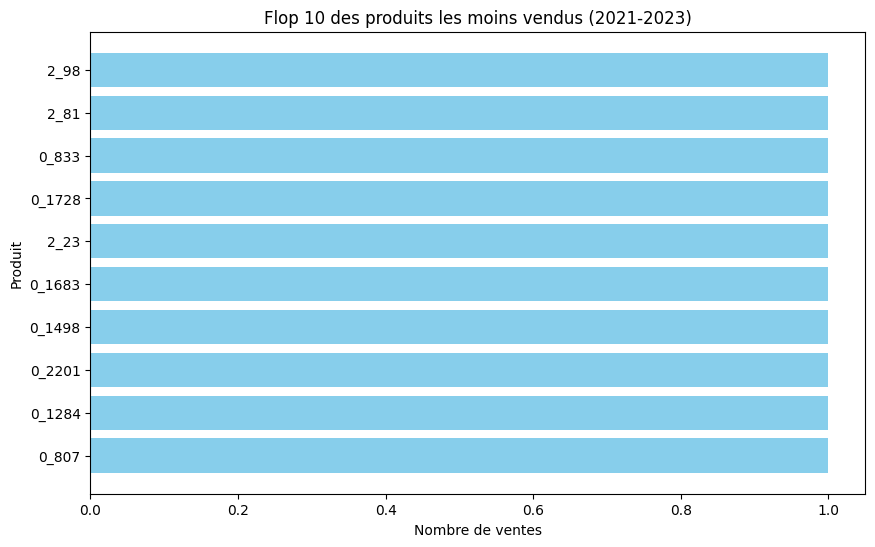

In [49]:
flop_ventes_toute_categ = (lapage.groupby(["id_prod", "categ"]).size().reset_index(name="nb_ventes").sort_values("nb_ventes", ascending=True).head(10))

plt.figure(figsize=(10,6))
plt.barh(flop_ventes_toute_categ["id_prod"], flop_ventes_toute_categ["nb_ventes"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Flop 10 des produits les moins vendus (2021-2023)")
plt.xlabel("Nombre de ventes")
plt.ylabel("Produit")
plt.show()

### La répartition par catégorie

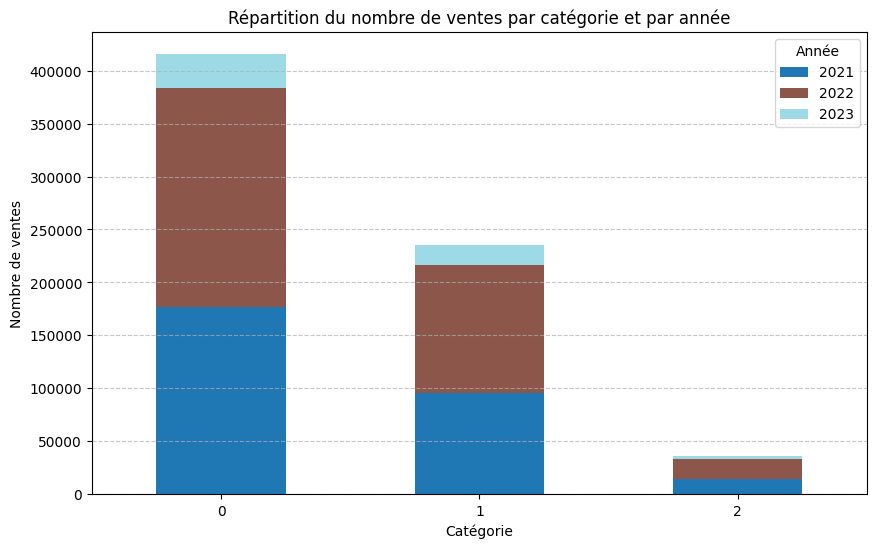

In [50]:
# Répartition du nombre de ventes par catégorie et par année

# Calcul du nombre de ventes par catégorie et année
ventes_par_categ_annee = (lapage.groupby(["categ", "annee"]).size().reset_index(name="nb_ventes"))

# Pivot du df ventes_par_categ_annee
ventes_pivot = ventes_par_categ_annee.pivot(index="categ", columns="annee", values="nb_ventes")

# Graphique
ventes_pivot.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

plt.title("Répartition du nombre de ventes par catégorie et par année")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Année")
plt.xticks(rotation=0)   # rotation des chiffres (catégorie)
plt.show()


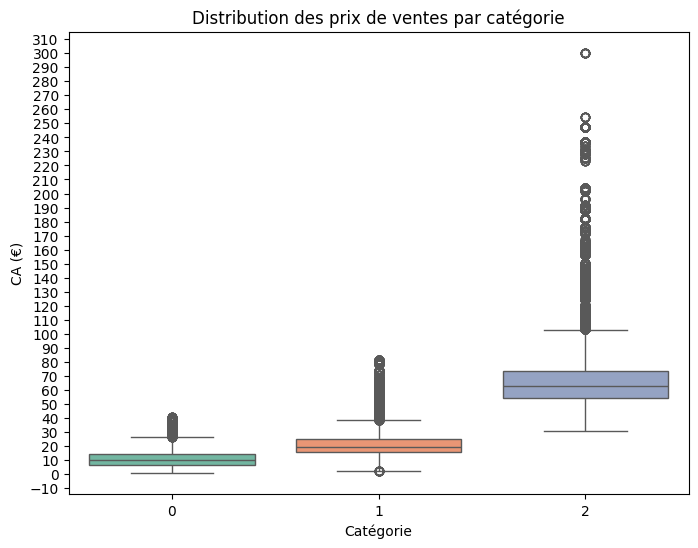

In [51]:
# Distribution des prix de ventes par catégorie

plt.figure(figsize=(8,6))
sns.boxplot(data=lapage, x="categ", y="CA", hue="categ", palette="Set2", legend=False)
plt.title("Distribution des prix de ventes par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("CA (€)")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

Catégorie 0 :

* Médiane autour de 10 €, la majorité des produits se situe entre 6 € et 14 €.
Plusieurs outliers dépassent 30 € et montent jusqu'à 40€

Catégorie 1

* Médiane autour de 20 €.
Intervalle interquartile (IQR) entre 15 € et 25 €.
Présence de nombreux outliers qui montent jusqu’à 80 €

Catégorie 2

* Médiane plus élevée, autour de 60 €.
La majorité des prix se situe entre 50 € et 70 €.
Beaucoup d’outliers importants, certains produits dépassent 300 €.

## Répartition du chiffre d'affaires pour les clients BtoB

### Identifier les clients BtoB

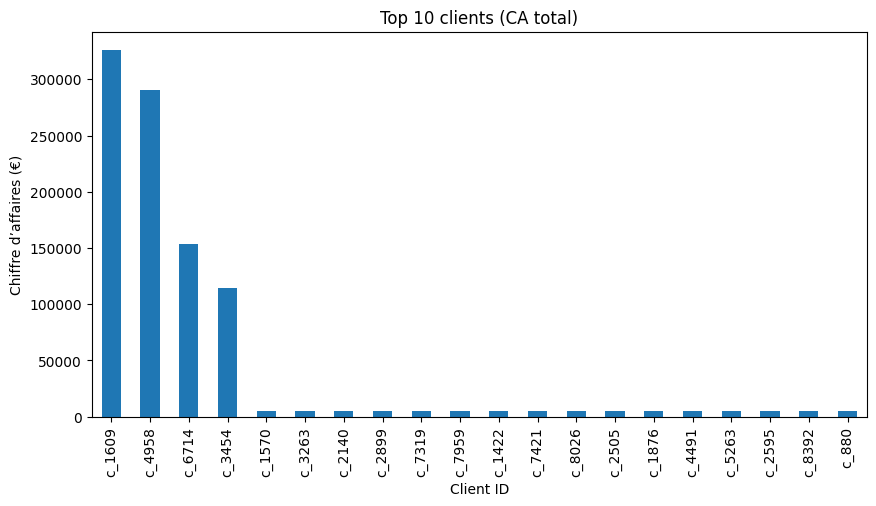

In [52]:
# Calcul du CA total par client
client_fidele = lapage.groupby(["client_id"])["CA"].sum().nlargest(20)

# groupby("client_id") : regroupe les ventes par client
# ["CA"].sum() : calcule le CA total de chaque client
# nlargest(20) : sélectionne directement les 20 plus grandes valeurs, évite .sort_value

# Graphique
plt.figure(figsize=(10,5))
client_fidele.plot.bar()
plt.xlabel('Client ID')
plt.ylabel('Chiffre d’affaires (€)')
plt.title('Top 10 clients (CA total)')
plt.show()


On remarque 4 clients qui sortent du lot. Ce sont nos clients BtoB.

In [53]:
# Création d'un df pour isoler les clients BtoB
client_btb = lapage[lapage['client_id'].isin(['c_1609', 'c_4958', 'c_6714', 'c_3454'])]

client_btb.head()

,id_prod,date,session_id,client_id,annee,mois,jour,annee_mois,sex,birth,CA,categ,age
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,2021,3,1,2021-03,m,1980,5.86,0,43
13,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,2021,3,1,2021-03,m,1980,7.99,0,43
50,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,2021,3,1,2021-03,m,1969,10.99,0,54
78,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,2021,3,1,2021-03,m,1980,12.99,0,43
88,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,2021,3,1,2021-03,m,1980,14.99,0,43


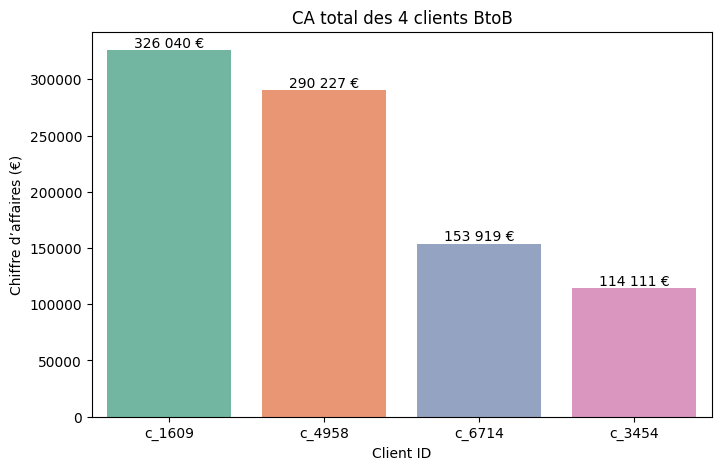

In [54]:
# Calcul du CA généré par les BtoB (2021 - 2022 - 2023)
ca_btb = client_btb.groupby("client_id")["CA"].sum().sort_values(ascending=False).reset_index()

#Graphique
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=ca_btb, x='client_id', y='CA',
    hue="client_id", palette="Set2", legend=False)

plt.title('CA total des 4 clients BtoB')
plt.ylabel('Chiffre d’affaires (€)')
plt.xlabel('Client ID')

# Ajouter les valeurs au-dessus des barres
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v.get_height():,.0f} €".replace(",", " ") for v in container])

plt.show()

## Courbe de Lorenz

Pour mesurer l'inégalité dans la répartition d'une variable (ici le CA), j'utilise la courbe de Lorenz et l'indice de Gini.

* L’axe X représente la proportion cumulée de clients.

* L’axe Y représente la proportion cumulée du chiffre d’affaires généré.

La diagonale (ligne grise) correspond à une situation d’égalité parfaite.

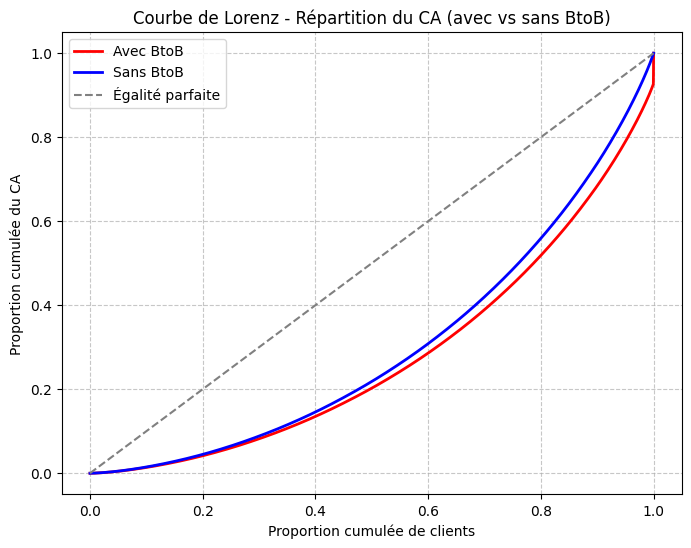

In [55]:
### Courbes de Lorenz - CA des clients (avec et sans BtoB) ###

# Récupère la liste des clients BtoB déjà définis
clients_btb_ids = client_btb['client_id'].unique()

# CA par client AVEC BtoB
ca_clients_all = (lapage.groupby("client_id")["CA"].sum().sort_values(ascending=True))
# groupby("client_id") : regroupe les ventes par client
# ["CA"].sum() : calcule le chiffre d’affaires total de chaque client
# sort_values(ascending=True) : trie du CA le plus faible au plus élevé

# Nombre total de clients
n_all = len(ca_clients_all)
# Cumul des CA
cumul_ca_all = ca_clients_all.cumsum()
# Normalisation en proportion (0 → 1)
part_clients_all = np.arange(1, n_all+1) / n_all
# proportion cumulée des clients
part_ca_all = cumul_ca_all / cumul_ca_all.max()
# proportion cumulée du CA

# CA par client SANS BtoB
ca_clients_no_btb = (lapage[~lapage['client_id'].isin(clients_btb_ids)].groupby("client_id")["CA"].sum().sort_values(ascending=True))
# lapage[~lapage['client_id'].isin(clients_btb_ids)] : filtre qui enlève les clients BtoB
# groupby("client_id")["CA"].sum() : calcule le CA total de chaque client particulier
# sort_values(ascending=True) : trie les clients du CA le plus faible au plus élevé

n_no_btb = len(ca_clients_no_btb)
cumul_ca_no_btb = ca_clients_no_btb.cumsum()
part_clients_no_btb = np.arange(1, n_no_btb+1) / n_no_btb
# proportion cumulée des clients hors BtoB
part_ca_no_btb = cumul_ca_no_btb / cumul_ca_no_btb.max()
# proportion cumulée du CA hors BtoB

# Tracé comparatif des deux courbes
plt.figure(figsize=(8,6))

plt.plot(part_clients_all, part_ca_all, label="Avec BtoB", color="red", linewidth=2)
plt.plot(part_clients_no_btb, part_ca_no_btb, label="Sans BtoB", color="blue", linewidth=2)
# deux courbes de Lorenz comparatives (avec et sans BtoB)

# Ligne d’égalité parfaite (45°)
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Égalité parfaite")

plt.title("Courbe de Lorenz - Répartition du CA (avec vs sans BtoB)")
plt.xlabel("Proportion cumulée de clients")
plt.ylabel("Proportion cumulée du CA")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


La courbe rouge (avec btob) est plus éloignée de la diagonale que la courbe bleu (avec btob). C'est à dire que lorsqu'on ajoute les clients btob, la répartition du CA est beaucoup plus inégale.

In [56]:
# Calcul de l'indice de Gini

# Fonction de calcul de l'indice de Gini à partir d'une distribution
def gini(array):
# S'assurer que c'est un numpy array et trier les valeurs
    array = np.array(array)
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)  # pas de valeurs négatives
    array = np.sort(array)       # tri croissant
    n = array.shape[0]
    cumul = np.cumsum(array)
# Formule du Gini
    return (n + 1 - 2 * (np.sum(cumul) / cumul[-1])) / n

# Calcul du Gini pour les deux cas
gini_all = gini(ca_clients_all.values)
gini_no_btb = gini(ca_clients_no_btb.values)

print("Indice de Gini (avec BtoB) :", round(gini_all, 3))
print("Indice de Gini (sans BtoB) :", round(gini_no_btb, 3))


Indice de Gini (avec BtoB) : 0.442
Indice de Gini (sans BtoB) : 0.398


L’indice de Gini est une mesure numérique de l’inégalité d’une distribution.

* Il est basé sur la courbe de Lorenz.

* Sa valeur est toujours comprise entre 0 et 1 :

  0 = égalité parfaite : tout le monde contribue de façon identique (ex. chaque client génère exactement le même CA).

  1 = inégalité totale : une seule personne concentre 100 % du CA et les autres rien.

Dans les deux cas, l’indice de Gini est relativement élevé, ce qui indique une répartition inégale du chiffre d’affaires entre les clients.

Cependant, en excluant les BtoB, l’indice diminue (0.398 vs 0.442) : cela confirme que les particuliers ont une répartition un peu plus homogène que lorsqu’on inclut les BtoB.

## Partie 2 - Analyses ciblées sur les clients

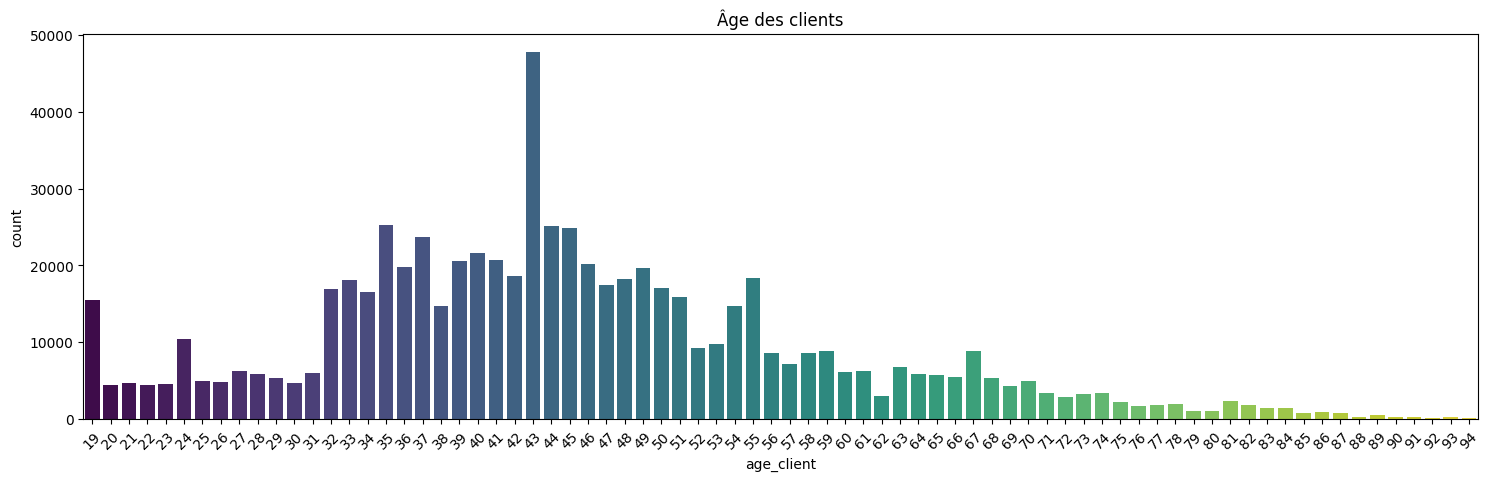

In [57]:
# Répartition des ages
age_client_count= lapage["age"].value_counts().rename_axis('age_client').reset_index(name='count').sort_values(by='age_client')

# lapage["age"].value_counts() compte combien de fois chaque âge apparaît dans la colonne "age"
# rename_axis('age_client') renomme l’index en "age_client" (au lieu de "age")

# Graphique
plt.figure(figsize=(18,5))
sns.barplot(
    data=age_client_count,
    x='age_client', y='count',
    hue='age_client',            # important !
    palette='viridis',           # dégradé
    dodge=False, legend=False)

plt.xticks(rotation=45)
plt.title('Âge des clients')
plt.show()

On observe une population plus nombreuse entre 35 et 45 ans. Puis plus on avance en age moins nous avons de clients. Ce qui peut s'expliquer par le fait que les personnes agées utilisent moins les plateformes d'achats en ligne.

Etonnement on voit un pic des personnes ayant 19 ans.

## Lien entre genre d'un client et catégories des livres achetés

In [58]:
# Nombre de transaction par sexe et par catégorie

# Exclure les clients BtoB
lapage_particuliers = lapage[~lapage['client_id'].isin(clients_btb_ids)]

table_contingence = lapage_particuliers.pivot_table(index='sex',columns='categ',values='session_id',aggfunc='count')

# index='sex' : lignes = sexe des clients
# columns='categ' : colonnes = catégories de produits
# values='session_id' : valeur à analyser = identifiant de session
# aggfunc='count' : fonction appliquée = count (comptage)

print(table_contingence)

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868


Le tableau de contingence présente la répartition des transactions par sexe et par catégorie, après exclusion des clients BtoB.

On peut voir une différence assez marquée

Pour vérifier si ces différences sont réellement significatives d’un point de vue statistique, nous allons appliquer un test du Chi² d’indépendance.

In [59]:
# Test Chi2 d'indépendance sur le tableau de contingence

chi2, p, dof, expected = chi2_contingency(table_contingence)
# chi2_contingency : applique le test du Chi² d'indépendance
# chi2 : valeur du Chi² calculée
# p : p-value du test
# dof : degrés de liberté (liés au nombre de modalités dans le tableau)
# expected : tableau des effectifs théoriques attendus si les variables étaient indépendantes

print("Chi² =", chi2)
print("p-value =", p)
print("Degrés de liberté =", dof)

Chi² = 22.66856665178056
p-value = 1.1955928116587024e-05
Degrés de liberté = 2


Le test Chi² compare deux choses :
- Les effectifs observés (ce que montre le tableau de contingence).
- Les effectifs attendus (ce qu’on devrait obtenir si hommes et femmes achetaient dans les mêmes proportions).

Plus la statistique de Chi² est grande, plus les variables sont dépendantes ; à l’inverse, plus elle est petite, plus elles sont indépendantes.  
Ici, Chi² = 22.67 : c’est une valeur modérée qui indique des différences présentes probable.

La p-value mesure la probabilité que ces écarts (le Chi²) soient dus au hasard.  
- Si p > 0.05 : les écarts pourraient être dus au hasard → on garde l’indépendance.  
- Si p < 0.05 : les écarts sont trop grands pour être dus au hasard → on rejette l’indépendance.  
Dans notre cas, p = 1.2e-05 (soit quasi nulle) → on rejette l’indépendance : sexe et catégorie sont liées.

Les degrés de liberté (ddl) dépendent du nombre de modalités : (lignes - 1) × (colonnes - 1).  
Ici : (2-1) × (3-1) = 2 ddl. Ils indiquent le nombre de comparaisons possibles et permettent de déterminer la loi du Chi² utilisée pour calculer la p-value.

CONCLUSION :

Le test du Chi² montre que la répartition des catégories de livres achetés n’est pas identique entre hommes et femmes. Même si les différences paraissent faibles, la p-value quasi nulle confirme que le genre influence de façon significative le choix de la catégorie

## le lien entre l'âge des clients et le montant total des achats

In [60]:
# Les deux variables sont quantitatives. Il faut tester si la relation est linéaire ou normale.

# Calcul du CA total par client et age
montant_total_client = lapage_particuliers.groupby(['client_id', 'age'])['CA'].sum().reset_index()
montant_total_client = montant_total_client.rename(columns={'CA': 'CA_total'})

montant_total_client.head()

,client_id,age,CA_total
0,c_1,68,629.02
1,c_10,67,1353.60
2,c_100,31,254.85
3,c_1000,57,2291.88
4,c_1001,41,1823.85


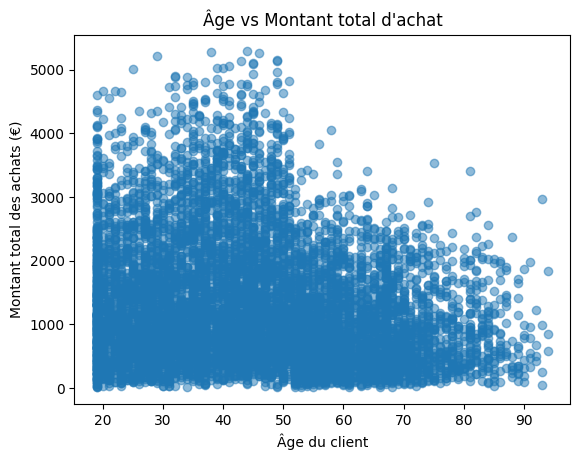

In [61]:
# Vérifier visuellement s'il existe une relation linéaire (scatter plot)

plt.scatter(montant_total_client['age'], montant_total_client['CA_total'], alpha=0.5)
plt.xlabel("Âge du client")
plt.ylabel("Montant total des achats (€)")
plt.title("Âge vs Montant total d'achat")
plt.show()

Le scatter plot âge / montant total montre une grande dispersion des montants totaux selon l’âge des clients.

Pas de tendance linéaire claire : le montant total ne semble pas augmenter ni diminuer régulièrement avec l’âge.

In [62]:
# Test de normalité (Kolmogorov car grand échantillon >5000 - Sinon Shapiro)

# Normalisation
data_particuliers = (montant_total_client['CA_total'] - montant_total_client['CA_total'].mean()) / montant_total_client['CA_total'].std(ddof=0)

# Test KS
stat, p = kstest(data_particuliers, 'norm')

print("KS-test (particuliers) statistic =", stat)
print("p-value =", p)

KS-test (particuliers) statistic = 0.10590246210009396
p-value = 2.110729288117549e-84


Le test Kolmogorov compare :

la distribution observée des données (ici le montant total des achats), avec une distribution théorique normale (en forme de cloche).

* H0 : les données suivent une loi normale.
* H1 : les données ne suivent pas une loi normale.

La statistique KS (comprise entre 0 et 1) = 0.105 indique l’écart maximal entre les deux distributions (observée vs normale). Soit un écart notable (relativement 'grand').

La p-value est quasi nulle (2.1e-84), bien inférieure au seuil de 0.05.

Conclusion : on rejette H0 → la distribution du montant total n’est pas normale.

In [63]:
# Loi normale écartée = test non paramètrique(Spearman)

# Corrélation Spearman âge / CA_total (sur les particuliers uniquement)
rho, pval = spearmanr(montant_total_client['age'], montant_total_client['CA_total'])

print("Coefficient de Spearman =", rho)
print("p-value =", pval)

Coefficient de Spearman = -0.18453804793783096
p-value = 1.0212910436382683e-66


Le test de corrélation de Spearman évalue la force et le sens d’une relation monotone entre deux variables quantitatives (ici l’âge des clients et le montant total des achats).
Il se base sur le classement (rangs) des valeurs, pas sur leur distribution.

* H0 : il n’existe aucune corrélation entre l’âge et le montant total.
* H1 : il existe une corrélation (positive ou négative).

Le coefficient de Spearman = -0.185 : indique une corrélation faible et négative (plus l’âge augmente, plus le montant total tend à être légèrement plus bas).

La p-value ≈ 1e-66 (quasi nulle) : bien en dessous du seuil de 0.05, donc la corrélation est statistiquement significative.

Conclusion : il existe une corrélation faible mais significative entre l’âge et le montant total des achats : les clients plus âgés dépensent en moyenne un peu moins que les plus jeunes.

## Lien entre l'age des clients et la fréquence d'achat

In [64]:
# Définir la fréquence d'achat (nombre de transaction) par client

# Calculer la fréquence d'achat (nombre de transactions) par client
freq_achat = lapage_particuliers.groupby('client_id')['session_id'].nunique().reset_index()
freq_achat = freq_achat.rename(columns={'session_id': 'freq_achat'})

# Ajouter cette info dans le DataFrame particuliers
montant_total_client = montant_total_client.merge(freq_achat, on='client_id', how='left')

# Vérification post-jointure
montant_total_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   client_id   8596 non-null   object 
 1   age         8596 non-null   int64  
 2   CA_total    8596 non-null   float64
 3   freq_achat  8596 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 268.8+ KB


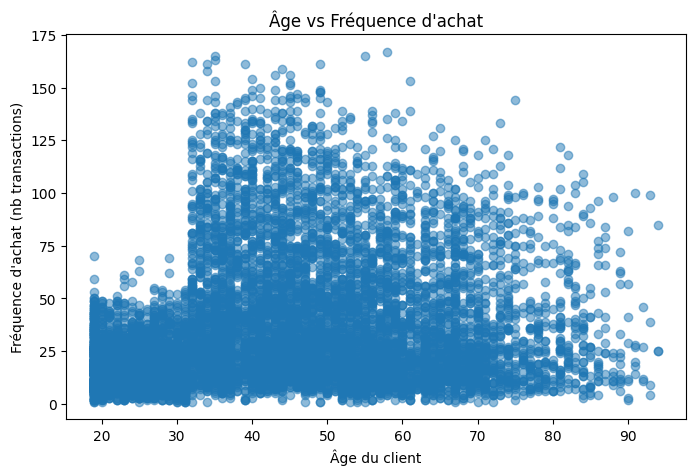

In [65]:
# Vérifier visuellement s'il existe une relation linéaire (scatter plot)

plt.figure(figsize=(8,5))
plt.scatter(montant_total_client['age'], montant_total_client['freq_achat'], alpha=0.5)
plt.xlabel("Âge du client")
plt.ylabel("Fréquence d'achat (nb transactions)")
plt.title("Âge vs Fréquence d'achat")
plt.show()


La majorité se situe en dessous de 50 transactions.

Visuellement, pas de tendance linéaire évidente, mais on remarque une certaine concentration de clients plus actifs entre 30 et 50 ans.

In [66]:
# Test de normalité Kolmogorov

# Normalisation
data_freq = (montant_total_client['freq_achat'] - montant_total_client['freq_achat'].mean()) / montant_total_client['freq_achat'].std(ddof=0)

# KS-test
stat, p = kstest(data_freq, 'norm')

print("KS-test statistic =", stat)
print("p-value =", p)

KS-test statistic = 0.15235266095635275
p-value = 1.1248213900968653e-174


H0 : la fréquence d’achat suit une loi normale.

H1 : la fréquence d’achat ne suit pas une loi normale.

Résultat : KS statistic > 0, p-value ≈ 0.000 (quasi nulle).

Conclusion : la distribution n’est pas normale.

In [67]:
# Données non normale = Spearman

rho, pval = spearmanr(montant_total_client['age'], montant_total_client['freq_achat'])

print("Coefficient de Spearman =", rho)
print("p-value =", pval)

Coefficient de Spearman = 0.21196373259671872
p-value = 6.629168433162815e-88


H0 : aucune corrélation entre âge et fréquence d’achat.

H1 : corrélation (positive ou négative).

Résultat : ρ = 0.212 → corrélation faible mais positive.

p-value ≈ 6.6e-88 (quasi nulle).

Conclusion : la relation est faible mais significative : en moyenne, les clients plus âgés réalisent un peu plus de transactions.

## Lien entre age des clients et panier moyen

In [68]:
# Calcul du panier moyen par client
montant_total_client['panier_moyen'] = montant_total_client['CA_total'] / montant_total_client['freq_achat']

montant_total_client[['client_id', 'age', 'CA_total', 'freq_achat', 'panier_moyen']].head()

,client_id,age,CA_total,freq_achat,panier_moyen
0,c_1,68,629.02,34,18.500588
1,c_10,67,1353.60,34,39.811765
2,c_100,31,254.85,5,50.970000
3,c_1000,57,2291.88,94,24.381702
4,c_1001,41,1823.85,47,38.805319


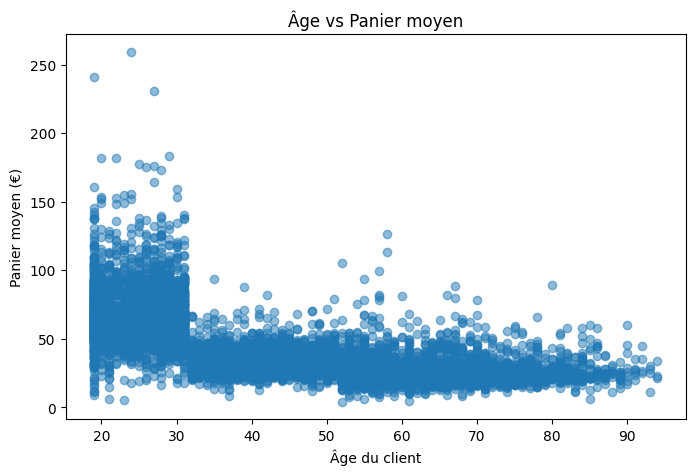

In [69]:
# Vérifier visuellement s'il existe une relation linéaire (scatter plot)

plt.figure(figsize=(8,5))
plt.scatter(montant_total_client['age'], montant_total_client['panier_moyen'], alpha=0.5)
plt.xlabel("Âge du client")
plt.ylabel("Panier moyen (€)")
plt.title("Âge vs Panier moyen")
plt.show()

Le nuage de points montre de fortes disparités du panier moyen, surtout chez les plus jeunes (<30 ans) où certains clients réalisent des paniers très élevés.

Globalement, le panier moyen diminue avec l’âge : les clients plus âgés dépensent moins par transaction.

In [70]:
# Test de normalité Kolmogorov

# Normalisation
data_panier = (montant_total_client['panier_moyen'] - montant_total_client['panier_moyen'].mean()) / montant_total_client['panier_moyen'].std(ddof=0)

# KS-test
stat, p = kstest(data_panier, 'norm')

print("KS-test statistic =", stat)
print("p-value =", p)

KS-test statistic = 0.18752607136649718
p-value = 3.966925583852342e-265


H0 : la distribution du panier moyen suit une loi normale.

H1 : la distribution du panier moyen ne suit pas une loi normale.

Résultat : KS = 0.188, p ≈ 3.9e-265 (quasi nul).

Conclusion : la distribution n’est pas normale.

In [71]:
# Loi normale non valide = Spearman

rho, pval = spearmanr(montant_total_client['age'], montant_total_client['panier_moyen'])

print("Coefficient de Spearman =", rho)
print("p-value =", pval)

Coefficient de Spearman = -0.7005505466475987
p-value = 0.0


H0 : aucune corrélation entre âge et panier moyen.

H1 : existence d’une corrélation.

Résultat :

Coefficient de Spearman = -0.701 → corrélation forte et négative.

p-value = 0.0 → très significative.

Conclusion : il existe une forte corrélation négative significative : plus l’âge augmente, plus le panier moyen diminue.

## Lien entre l'age et la catégorie des livres achetés

In [72]:
# Extraire uniquement l'âge et la catégorie des clients particuliers
age_categ = lapage_particuliers[['age', 'categ']].dropna()

age_categ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640734 entries, 0 to 687533
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   age     640734 non-null  int64 
 1   categ   640734 non-null  string
dtypes: int64(1), string(1)
memory usage: 14.7 MB


Avant d’appliquer un test comparatif (ANOVA ou Kruskal-Wallis), il faut vérifier si l’âge des clients suit une loi normale dans chaque catégorie de livres.  
Pour cela, on applique le test de Kolmogorov séparément sur les trois groupes.

In [73]:
# Vérification loi normale ou non

for cat in age_categ["categ"].unique():
    ages_cat = age_categ[age_categ["categ"] == cat]["age"].dropna()

    # Normalisation (centrer-réduire) avant le test KS
    ages_norm = (ages_cat - ages_cat.mean()) / ages_cat.std(ddof=0)

    stat, p = kstest(ages_norm, "norm")
    print(f"Catégorie {cat} : stat={stat:.3f}, p-value={p:.3f}")

Catégorie 0 : stat=0.111, p-value=0.000
Catégorie 1 : stat=0.044, p-value=0.000
Catégorie 2 : stat=0.251, p-value=0.000


H0 : l’âge des clients suit une loi normale dans chaque catégorie.

H1 : l’âge ne suit pas une loi normale dans au moins une catégorie.

Conclusion : aucune des catégories n’a une distribution normale : l’ANOVA n’est pas applicable.


In [74]:
ages_cat0 = age_categ[age_categ["categ"] == "0"]["age"]
ages_cat1 = age_categ[age_categ["categ"] == "1"]["age"]
ages_cat2 = age_categ[age_categ["categ"] == "2"]["age"]

stat, p = kruskal(ages_cat0, ages_cat1, ages_cat2)
print(f"Kruskal-Wallis : stat={stat:.3f}, p-value={p:.3f}")

Kruskal-Wallis : stat=71359.734, p-value=0.000


H0 : les distributions d’âge sont identiques entre les 3 catégories.

H1 : au moins une catégorie a une distribution d’âge différente.

Résultat :

Stat = 71 360

p-value = 0.000 (quasi nulle)

Conclusion : on rejette H0, les résultats montrent une différence significative : l’âge moyen des clients varie selon la catégorie de livres achetés

CONCLUSION DES ANALYSES :

Les analyses ont montré que le genre influence de façon significative la répartition des catégories de livres, même si les différences paraissent faibles visuellement. L’âge joue également un rôle important : les clients plus âgés dépensent un peu moins au total, achètent plus souvent mais avec un panier moyen nettement plus faible. Ces résultats sont cohérents entre eux et traduisent une évolution des habitudes de consommation avec l’âge. Enfin, les catégories de livres varient elles aussi selon l’âge, ce qui confirme l’existence de profils clients distincts.